## ___Dimensionality Reduction & PCA___
------------------

In [39]:
import numpy as np
np.random.seed(2024 - 6 - 21)
import matplotlib.pyplot as plt

In [40]:
# the goal of PCA is to reduce the dimensions of a high dimensional dataset!
# this reduction targets the features / columns since reducing rows will mean sacrificing information
# in a high dimensional dataset with 286 features, PCA can map it into a two dimensional dataset with just two columns with the
# same number of rows / records
# this would still sufficiently preserve the distribution patterns in the higher dimension!

In [41]:
# the idea behind dimensionality reduction is to map the data into a lesser dimensional vector space.
# this is called a projection.

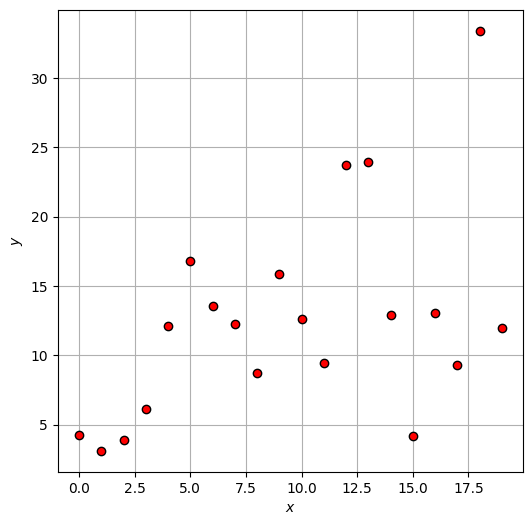

In [42]:
x = np.arange(start = 0, stop = 20)
y = x + np.random.normal(loc = 2, scale = 5, size = x.size)

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(6, 6)
axes.scatter(x, y, color = "red", edgecolor = "black")
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

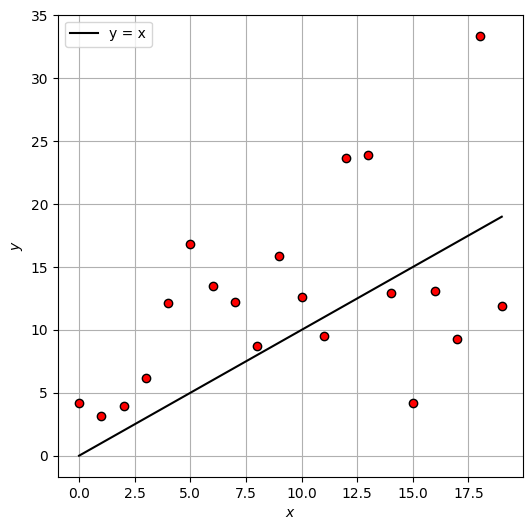

In [43]:
# Now, how do we map these points (two dimensional coordinates or vectors) to a one dimensional space (a line y = x)?

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(6, 6)
axes.scatter(x, y, color = "red", edgecolor = "black")
axes.plot(x, x, color = "black", label = "y = x")
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
axes.legend()
plt.show()

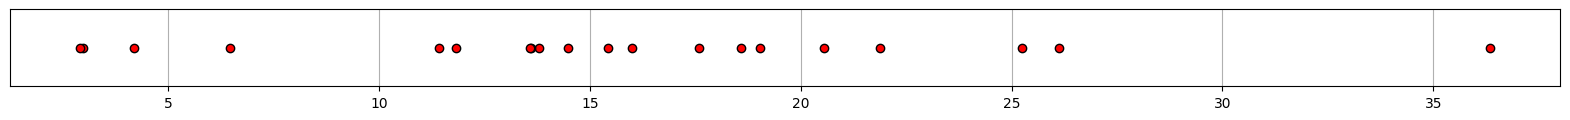

In [44]:
# mapping using the formula (x + y) / sqrt(2)

one = (x + y) / np.sqrt(2)

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(one, np.zeros(one.size), color = "red", edgecolor = "black")
axes.grid()
axes.set_yticks([])
plt.show()

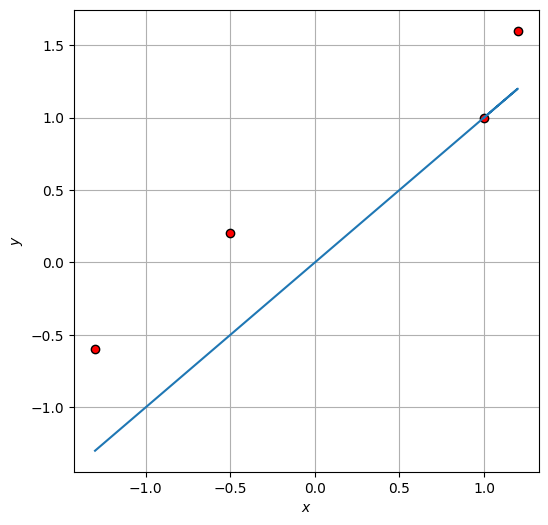

In [45]:
# another example

coords = np.array(((1.0, 1.0), (1.2, 1.6), (-0.5, 0.2), (-1.3, -0.6)))

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(6, 6)
axes.scatter(coords[:, 0], coords[:, 1], color = "red", edgecolor = "black")
axes.plot(coords[:, 0], coords[:, 0])  # y = x line
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

In [46]:
coords * np.array([1, 1]) / np.sqrt(2) # the vector [1, 1] is our projector

array([[ 0.70710678,  0.70710678],
       [ 0.84852814,  1.13137085],
       [-0.35355339,  0.14142136],
       [-0.91923882, -0.42426407]])

In [47]:
x = (coords * np.array([1, 1]) / np.sqrt(2)).sum(axis = 1)

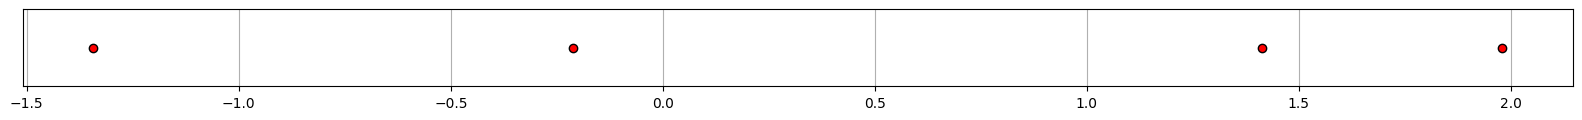

In [48]:
fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(x, np.zeros(x.size), color = "red", edgecolor = "black")
axes.grid()
axes.set_yticks([])
plt.show()

# ___$M_p = M \frac{\overrightarrow{v}}{||\overrightarrow{v}||_2}$___

In [49]:
# M_p is the projection
# M is the projector matrix
# v is the vector
# ||v||_2 is the L2 norm of the vector

# if the matrix M has r rows and c columns, the vector v must have c length

## ___How to pick the vector to project onto?___
-----------------

In [50]:
x = np.random.randint(low = 10, high = 20, size = 20)
y = np.random.randint(low = -50, high = 50, size = x.size)

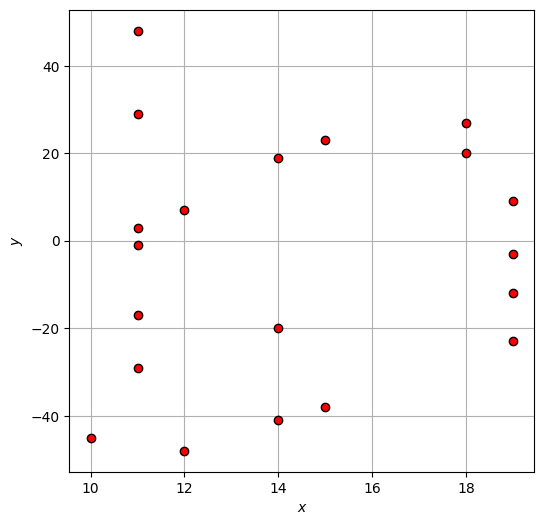

In [51]:
fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(6, 6)
axes.scatter(x, y, color = "red", edgecolor = "black")
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

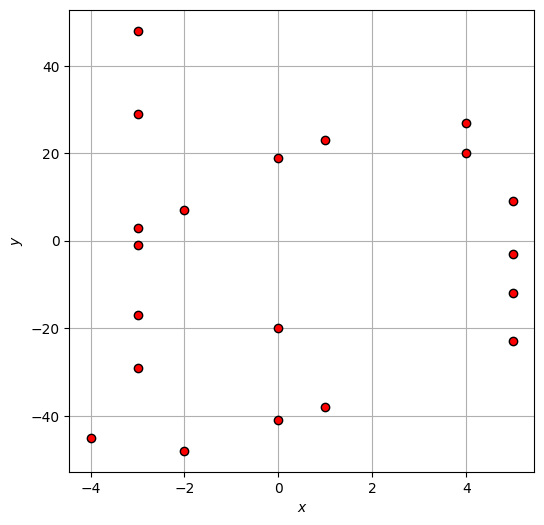

In [52]:
# the x values is not centered around 0, let'd take care of that

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(6, 6)
axes.scatter(x - np.median(x), y, color = "red", edgecolor = "black")
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

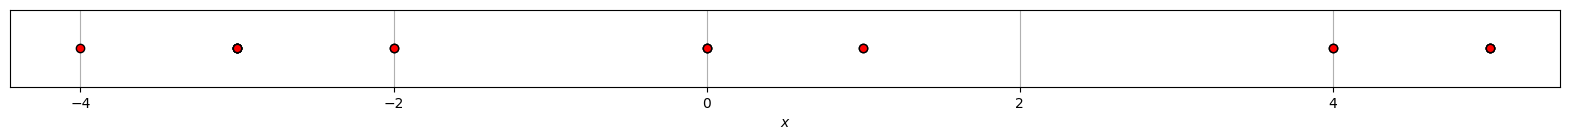

In [53]:
# let's project the above data points onto the x axis,

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(x - np.median(x), np.zeros(x.size), color = "red", edgecolor = "black")
axes.set_xlabel("$x$")
axes.set_yticks([])
axes.grid()
plt.show()

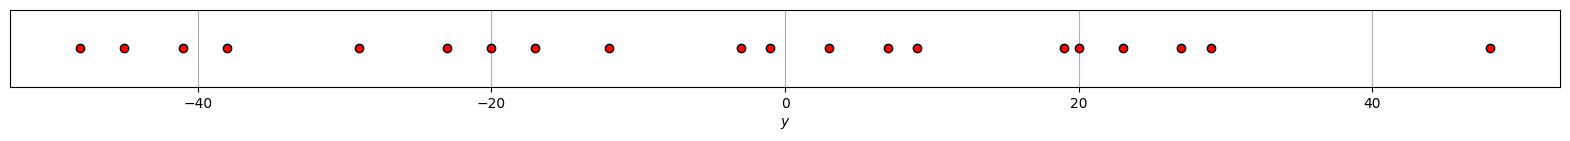

In [54]:
# let's project the above data points onto the y axis,

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(y, np.zeros(x.size), color = "red", edgecolor = "black")
axes.set_xlabel("$y$")
axes.set_yticks([])
axes.grid()
plt.show()

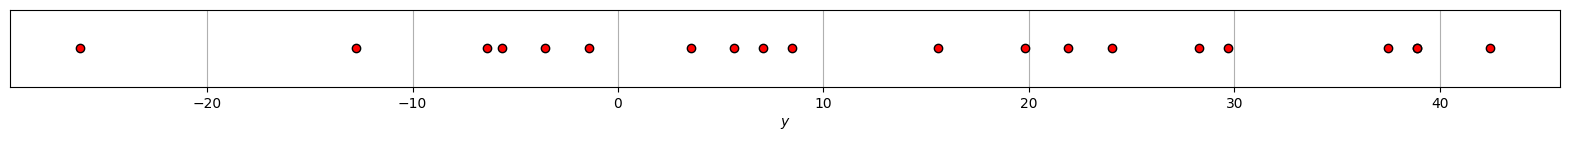

In [70]:
# projecting onto y = -x line

proj = (np.stack([x, y], axis = 1) * np.array([1, -1]) / np.sqrt(2)).sum(axis = 1)

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(proj, np.zeros(proj.size), color = "red", edgecolor = "black")
axes.set_xlabel("$y$")
axes.set_yticks([])
axes.grid()
plt.show()

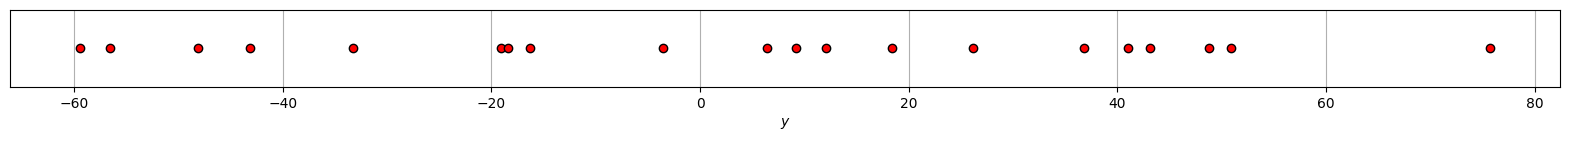

In [73]:
# projecting onto y = 2x line

proj = (np.stack([x, y], axis = 1) * np.array([1, 2]) / np.sqrt(2)).sum(axis = 1)

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(proj, np.zeros(proj.size), color = "red", edgecolor = "black")
axes.set_xlabel("$y$")
axes.set_yticks([])
axes.grid()
plt.show()

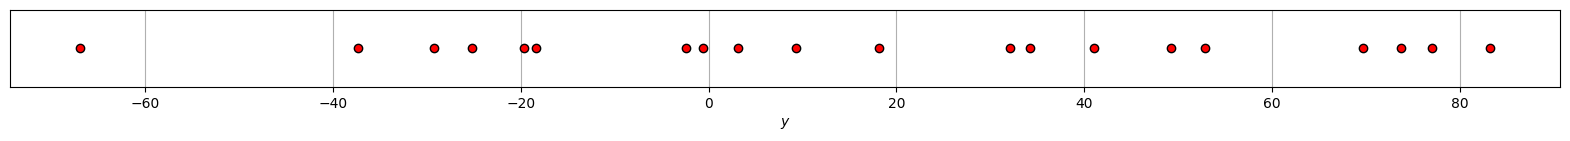

In [74]:
# projecting onto y = -2.2x line

proj = (np.stack([x, y], axis = 1) * np.array([1, -2.2]) / np.sqrt(2)).sum(axis = 1)

fig, axes = plt.subplots()
axes.set_axisbelow(True)
fig.set_size_inches(20, 1)
axes.scatter(proj, np.zeros(proj.size), color = "red", edgecolor = "black")
axes.set_xlabel("$y$")
axes.set_yticks([])
axes.grid()
plt.show()

In [ ]:
# the main takeaway here is that the projector decides how spread out the data points are when mapped to a lesser dimensional space
# this is really critical since we should always strive to preserve the variation in the higher dimensional dataset as much as possible!
# the projector that yields the most sparsely distributed mappings is the best one!